
<font size = "5"> **Chapter 4: [Spectroscopy](CH4_00-Spectroscopy.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />



# Introduction to  Electron Energy-Loss Spectroscopy


[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_01-Introduction.ipynb)

part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2024

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Preliminaries
### Check Installed Packages

In [2]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2023.3.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
print('done')

done


### Import all relevant libraries

Please note that the EELS_tools package from pyTEMlib is essential.

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
    
import warnings
warnings.filterwarnings('ignore')

# Import libraries from the book
import pyTEMlib
import pyTEMlib.file_tools as ft          # File input/ output library
from pyTEMlib import eels_tools  

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
pyTEM version:  0.2023.8.1


## Introduction

### Parts of an EELS Spectrum:


![EELS spectrum](images/EELS.jpg "Title")


**No energy transfer**

The zero--loss peak is caused by electrons of the acceleration energy which apparently did not loose any energy (or only a tiny amount in a quasi--elastic scattering). 

**Little energy transfer: 1-70 eV**

The valence--loss region shows intraband, interband, and plasmon  transitions.

**High energy transfer: above 70eV**

The core--loss region contains excitation from the atom core levels into the conduction band appear as saw tooth like edges.


### Inelastic Excitation
Energy is transfered to an atom in ground state and after a while (femto seconds) this atoms will change its electron levels and shell occupations and becomes an excited atom.


<img title="inelastic excitation" width="50%" alt="inelastic excitation" src="images/inelastic2.jpg">


After some time (femto seconds to minutes) this atoms falls back to the ground state and after a little while longer (femto seconds), the atom emits this energy either in form of photons (in the light and  X-ray spectrum)  or Auger electron. 


So we have two obervable processes:

**energy transfer to the atom in ground state**
- primary energy transfer
       - electron energy-loss spectroscopy

**excited atom emitting energy**
- secondary processes
       - electron energy-loss spectroscopy
       - Auger spectroscopy
       - energy-dispersive X-ray spectroscopy
       - Cathodoluminescence
  

### EELS Spectrometer

We use a magnetic field to bend the electron beam (here 90$^{\rm o}$) which acts like a prism for light and separates the electrons by spead (kinetic energy). The faster electrons will get bent less. 

<img title="EELS spectrometer" width="50%" alt="EELS spectrometer and prism" src="images/EELS_Spectrometer.jpg">

With such a prism for electrons we can determine the energy lost in the sample. 



### EELS and STEM

The advantage of EELS in STEM mode is that we get a HAADF signal and the bright field signal is analysed with EELS spectroscopy. So we get spatially resolved image and chemical information simultaneously.

<img title="EELS and STEM" width="50%" alt="EELS and STEM" src="images/Z-Contrast.jpg">

## Load an EELS Spectrum


<IPython.core.display.Javascript object>


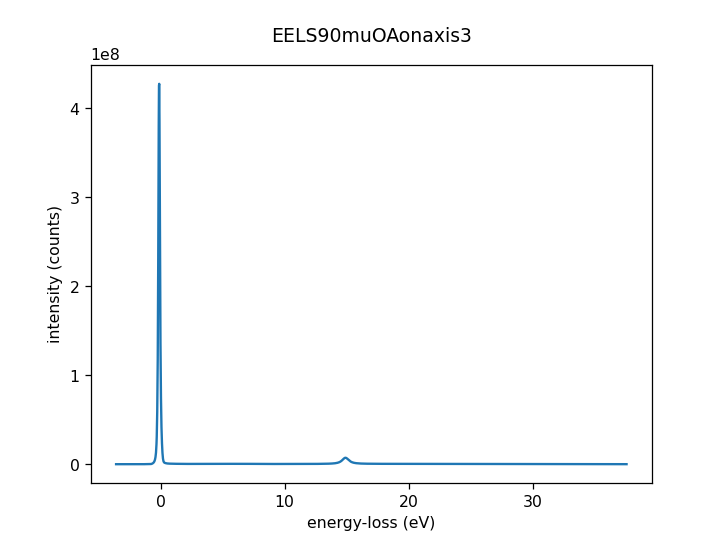

In [2]:
# Load file
filename = '../example_data/AL-DFoffset0.00.dm3'
datasets = ft.open_file(filename)
eels_dataset = datasets['Channel_000']
view = eels_dataset.plot()

### Important Parameters in an EELS spectrum

A lot of information is stored in the ``original_metadata``. 

We will learn in this ``Spectroscopy`` section of the lecture which ones are absolutely necessary. 

In [4]:
eels_dataset.view_original_metadata()

The information is contained in a python dictionary and we will have to data mine this information to get the experimental conditions.

In [5]:
for key in eels_dataset.original_metadata:
    print(key)
print()
print(" Dictionary: original_metadata['ImageList']['1']['ImageTags']['EELS']['Acquisition'] ")
for key, item  in eels_dataset.original_metadata['ImageTags']['EELS']['Acquisition'].items():
    print(key, item)

Of course there is a function for this (in pyTEMlib.eels_tools).

In [6]:
eels_dataset.view_metadata()

### Make Energy Scale andPlot

The energy scale above is linear and so a linear increasing numpy array (of size *eels_dataset.shape[0]*)  is multiplied with the channel width (*sipersion*), the first channel is in the variable *offset*.

In [ ]:
print(f"Dispersion [eV/pixel] : {ft.get_slope(eels_dataset.energy_loss):.2f} eV ")
print(f"Offset [eV] : {eels_dataset.energy_loss[0]:.2f} eV ")
print(f"Maximum energy [eV] : {eels_dataset.energy_loss[-1]:.2f} eV ")

energy_scale = np.arange(eels_dataset.shape[0])

dispersion = ft.get_slope(eels_dataset.energy_loss)
energy_scale = energy_scale * dispersion

offset = eels_dataset.energy_loss[0]
energy_scale = energy_scale + offset

plt.figure()
plt.plot(energy_scale, eels_dataset);


Let's compare the keys in the current_channel and  in the dictionary 

### Normalizing Intensity Scale
The following normalization makes only sense if this is a low loss spectrum, <br> where the total number of counts represents approximatively the incident current **$I_0$**

In [ ]:
I_0 = sumSpec = float(np.sum(np.array(eels_dataset)))
plt.figure()
plt.plot(energy_scale,eels_dataset/sumSpec*1e2)
plt.title ('Spectrum '+eels_dataset.title);
plt.xlabel('energy loss [eV]')
plt.ylabel('% scattering Intensity');
#plt.xlim(-10,50)
#plt.ylim(0,8);


## Summary
The metadata are as important as the values of a spectrum.

Make sure all metadata are saved, whcih ususally means to store data in the proprietary format of the software used.

## Navigation
- <font size = "3">  **Up Chapter 4: [Imaging](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Back: [Overview](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Next:  [Fit Zero-Loss](CH4_02-Fit_Zero_Loss.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
